## **Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms**

### **Importing the Drive and mounting it.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing the **Dataset from Google Drive** which was recommended and **Setting the Directory.**

In [ ]:
import pandas as pd
import os
data_directory = '/content/drive/MyDrive/Task-1_dataset'
train_dataset = pd.read_csv(os.path.join(data_directory, 'train.csv'))
test_dataset = pd.read_csv(os.path.join(data_directory, 'test.csv'))

### **Checking the Dataset and getting the some rows of the Dataset.**

In [ ]:
train_dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Getting the Information of the **DATASET**

In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### **Checking if there is any VACANT place in the DATASET.**

In [ ]:
train_dataset.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


This code identifies and returns the column names in the train_dataset that contain missing (null) values.

In [ ]:
train_dataset.columns[train_dataset.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

This code identifies and returns the column names in the test_dataset that contain missing (null) values.

In [ ]:
test_dataset.columns[test_dataset.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

This code performs both backward and forward filling of missing values in the train_dataset and test_dataset by filling null values with the next or previous available value, respectively.

In [ ]:
train_dataset.bfill(inplace=True)
train_dataset.ffill(inplace=True)

test_dataset.bfill(inplace=True)
test_dataset.ffill(inplace=True)

Again, let's check for the confirmation.

In [ ]:
train_dataset.columns[train_dataset.isnull().any()]



Index([], dtype='object')

In [ ]:
test_dataset.columns[test_dataset.isnull().any()]

Index([], dtype='object')

Let's now import the Liinear Regression from the sklearn.linear_model and initializes a linear regression model object named mdoel.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Now, let's set the features as X_train and target variable as y_train from train_dataset fro the training the model.

In [ ]:
X_train = train_dataset[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y_train = train_dataset['SalePrice']

Similarly, let's select the features from test_dataset and store them into X_test fro the prediction purpose.

In [ ]:
X_test = test_dataset[['GrLivArea', 'BedroomAbvGr', 'FullBath']]


Now, let's TRAIN the Linear Regression Model using the X_train features and y_train target variable.

In [ ]:
model.fit(X_train, y_train)


LinearRegression()

Let's make the model to predict the :inear Regresssion Model on the X_train features, and store into y_train_pred.

In [ ]:
y_train_pred = model.predict(X_train)

Now, let's calculate the Mean Squared Error and R-squared metrics to evaluate the performance of the model on the model trainning data, comparing the true values with the predicted values.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

Let's print the values of the model predictions.

In [ ]:
print(f"Training Mean Squared Error: {mse_train}")
print(f"Training R^2 Score: {r2_train}")

Training Mean Squared Error: 2628535155.618378
Training R^2 Score: 0.5832212987566321


In [ ]:
y_test_pred = model.predict(X_test)

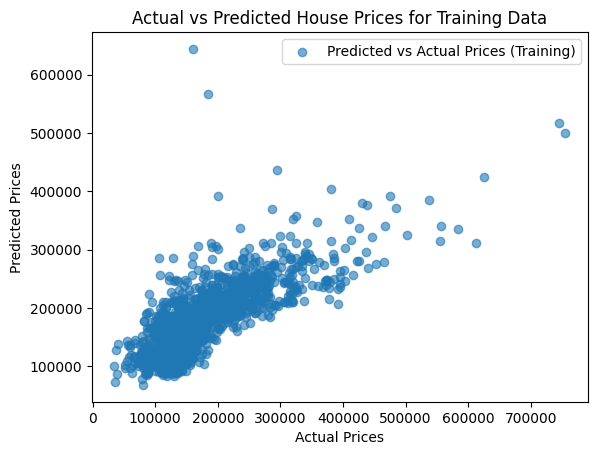

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_train_pred, label='Predicted vs Actual Prices (Training)', alpha=0.6)
plt.title('Actual vs Predicted House Prices for Training Data')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()